In [1]:
from cuqi.distribution import DistributionGallery, Gaussian, JointDistribution
from cuqi.testproblem import Poisson1D
from cuqi.problem import BayesianProblem
import cuqi
import inspect
import numpy as np
import matplotlib.pyplot as plt
from cuqi.sampler import MH, CWMH, ULA, MALA, NUTS
import time

import scipy.stats as sps
from scipy.stats import gaussian_kde
import pandas as pd
import cProfile, pstats, io
from pstats import SortKey
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import sys
# Change the current working directory to the root of the project
sys.path.append(os.path.abspath('..'))
import math

# Now you should be able to import the module
from utilities import TableAutomization as TA
from benchmarksClass import _benchmarks as BM
from benchmarksClass import _donut as donut
from benchmarksClass import _simplestbip as SB



In [2]:
# The donut distribution 
target_donut = SB.SimplestBip()


/Users/naoki/Desktop/CUQIpy_project/CUQIpy/cuqi/problem/_problem.py:22: SyntaxWarning: invalid escape sequence '\m'
  """ Representation of a Bayesian inverse problem defined by any number of densities (distributions and likelihoods), e.g.


ValueError: Unable to extract posterior for this problem. Current target is: 
 JointDistribution(
    Equation: 
	p(model,x) = p(model|x)p(x)
    Densities: 
	model ~ CUQI Gaussian. Conditioning variables ['x'].
	x ~ CUQI Gaussian.
)

In [3]:
df, (fig, axs)  = TA.create_comparison(
    target_donut, 
    [0.05, 0.05, 0.065, 0.065, 0.05 ], 
    [100, 85, 100, 100, 100], 
    [0, 15, 0, 50, 10], 
    x0 = np.array([1, 1]),
    seed=12, 
    chains = 2
)


Sample 100 / 100

Average acceptance rate: 0.77 

Sample 100 / 100

Average acceptance rate all components: 0.7 

Sample 100 / 100
Sample 150 / 150
Sample 110 / 110


In [4]:
TA.print_table(df)

+----------+---------+----------+-------+---------+---------+-------+--------+----------+
|  Method  | Samples | Burn-ins | Scale | ESS(v0) | ESS(v1) |   AR  | LogPDF | Gradient |
+----------+---------+----------+-------+---------+---------+-------+--------+----------+
| MH_fixed |   100   |    0     |  0.05 |  2.019  |   1.59  |  0.77 |  100   |    0     |
|   CWMH   |    85   |    15    |  0.05 |  1.433  |  1.812  | 0.682 |  199   |    0     |
|   ULA    |   100   |    0     | 0.065 |  20.874 |  7.615  |  1.0  |  100   |   100    |
|   MALA   |   100   |    50    | 0.065 |  48.069 |  6.837  |  0.53 |  150   |   150    |
|   NUTS   |   100   |    10    |   -   |  22.656 |  37.313 |  0.8  |  3056  |   3056   |
+----------+---------+----------+-------+---------+---------+-------+--------+----------+


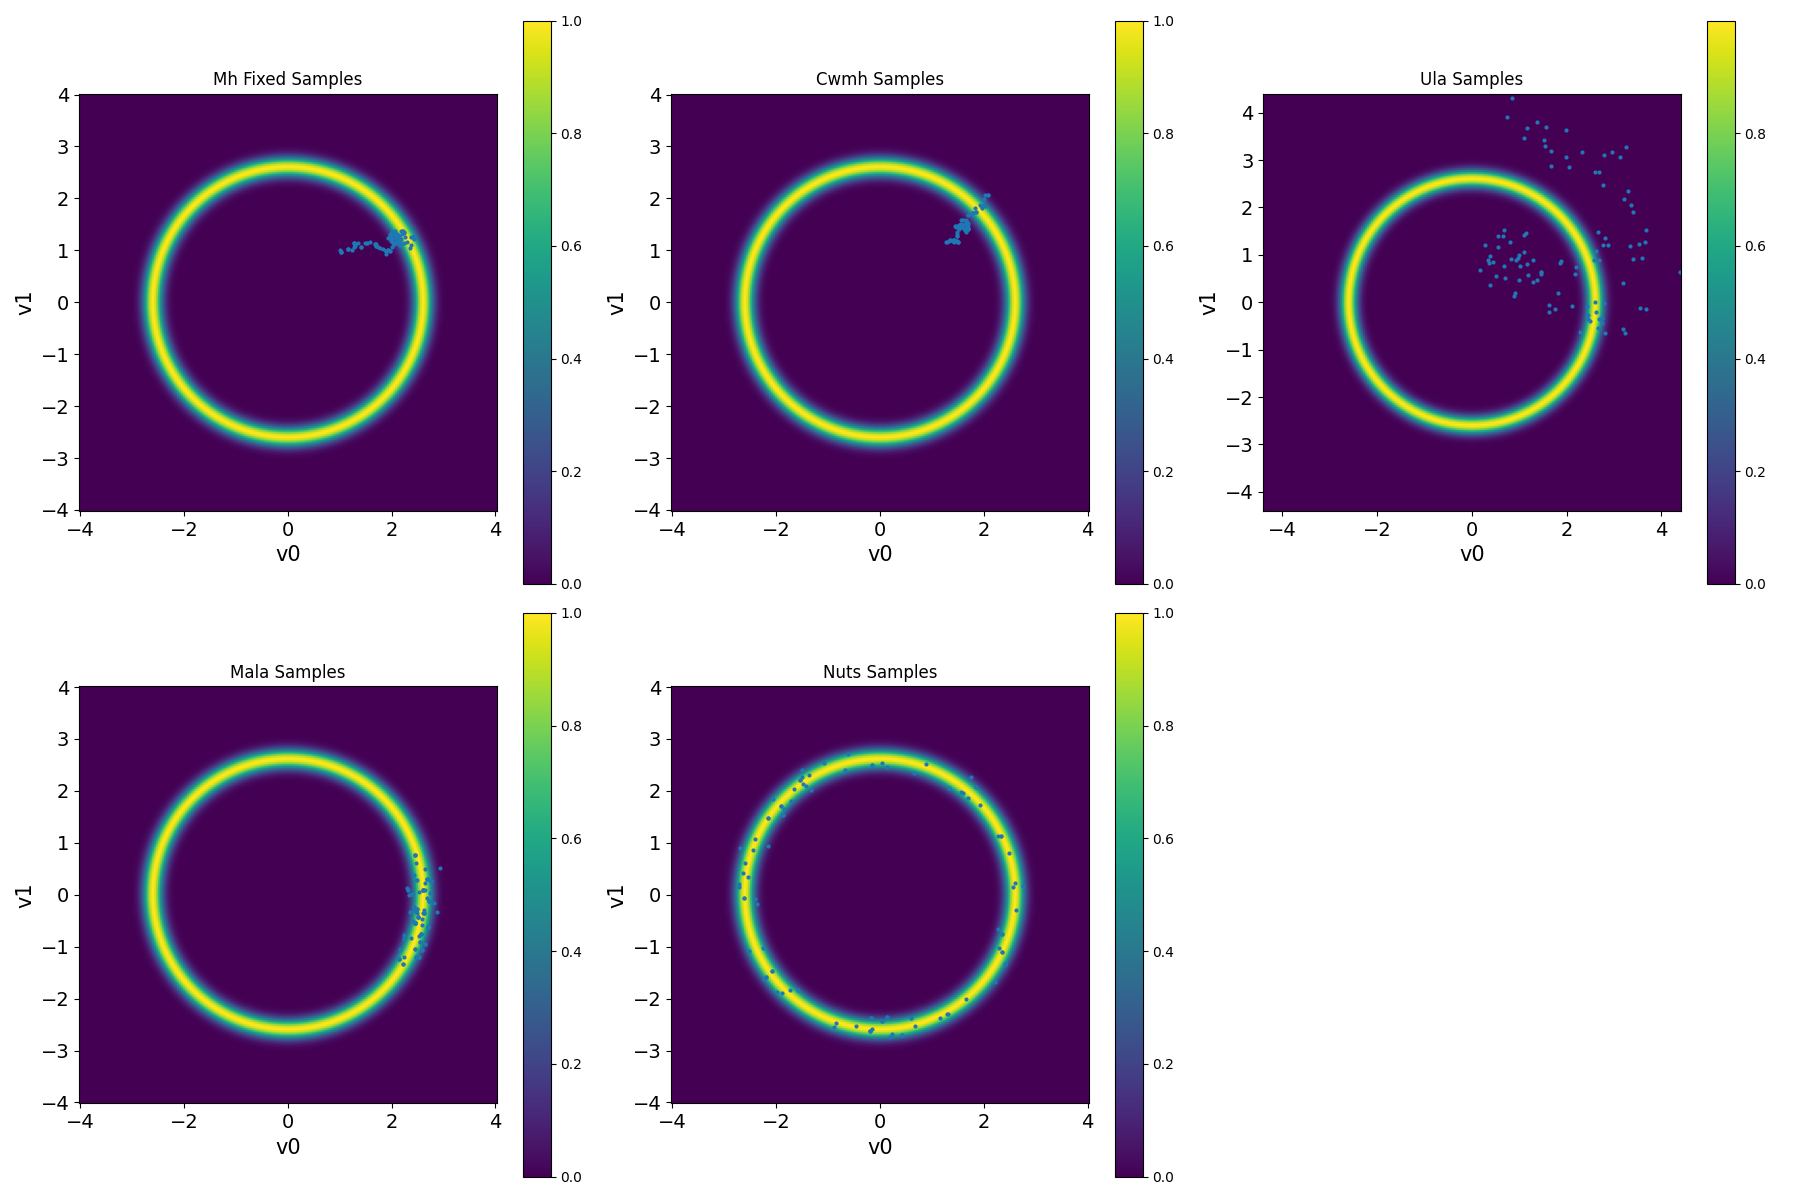

In [5]:
TA.show_plot(fig)